In [176]:
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
import torch
import sys
sys.path.append('../')
from latent_rationale.nn.kuma import Kuma, HardKuma
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.options.display.max_colwidth = 1000


In [124]:
a = widgets.FloatSlider(description='a =', min=0.01, max=10)
b = widgets.FloatSlider(description='b =', min=0.01, max=10)

In [132]:
%matplotlib widget
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Kumaraswamy DIstribution

In [127]:
display(a, b)

FloatSlider(value=0.01, description='a =', max=10.0, min=0.01)

FloatSlider(value=0.5, description='b =', max=10.0, min=0.01)

In [152]:
dist = HardKuma([torch.tensor(a.value), torch.tensor(b.value)], support=(-0.1, 1.1))
print(dist.pdf(0.0))


def plot(dist):
    x = np.linspace(-0.1, 1.1)
    p = dist.pdf(torch.from_numpy(x).float())
    print(p)
    plt.plot(x, p)
    plt.title(f'{dist.__class__.__name__}(a={a.value}, b={b.value}) PDF')


tensor([0.0426])


tensor([0.2887, 0.2887, 0.2887, 0.2887, 0.2887, 0.4397, 0.4448, 0.4501, 0.4555,
        0.4612, 0.4670, 0.4731, 0.4795, 0.4861, 0.4930, 0.5002, 0.5077, 0.5156,
        0.5238, 0.5325, 0.5416, 0.5512, 0.5613, 0.5720, 0.5833, 0.5954, 0.6082,
        0.6218, 0.6365, 0.6522, 0.6691, 0.6875, 0.7074, 0.7292, 0.7531, 0.7795,
        0.8089, 0.8420, 0.8794, 0.9223, 0.9722, 1.0312, 1.1024, 1.1907, 1.3044,
        0.2887, 0.2887, 0.2887, 0.2887, 0.2887])
tensor([   nan,    nan,    nan,    nan,    nan, 0.5057, 0.5122, 0.5189, 0.5259,
        0.5331, 0.5407, 0.5486, 0.5569, 0.5655, 0.5746, 0.5841, 0.5942, 0.6047,
        0.6158, 0.6276, 0.6401, 0.6533, 0.6674, 0.6825, 0.6986, 0.7159, 0.7346,
        0.7548, 0.7768, 0.8009, 0.8273, 0.8565, 0.8890, 0.9256, 0.9670, 1.0146,
        1.0700, 1.1356, 1.2149, 1.3135, 1.4409, 1.6144, 1.8708, 2.3078, 3.3372,
           nan,    nan,    nan,    nan,    nan])


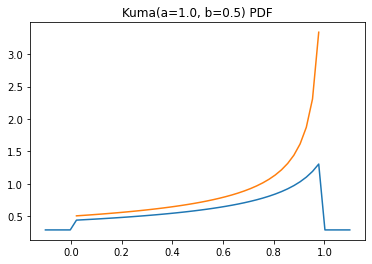

In [150]:
plot(HardKuma([torch.tensor(a.value), torch.tensor(b.value)], support=(-0.1, 1.1)))
plot(Kuma([torch.tensor(a.value), torch.tensor(b.value)]))

In [157]:
! ls ..

LICENSE                   esnli.py                  notebooks
README.md                 get_precision_recall.py   requirements.notebook.txt
data                      latent_rationale          requirements.txt
download_data.sh          masked_examples.json      venv


## Masked Sentences

In [196]:
import re
df = pd.read_json('../masked_examples.json')
df.rename({ 'original': 'Original Sentence', 'masked': 'Masked Sentence' }, axis=1, inplace=True)
df = df.applymap(lambda x: r'\shortstack{' + re.sub(r'\[SEP\]$', '', x).replace(r'[CLS]', r'\emph{Premise}:').replace('[SEP]', r'\\ \emph{Hypothesis:}') + r'}')
df

,Original Sentence,Masked Sentence
0,\shortstack{\emph{Premise}: a woman poses with sunglasses shaped like dollar signs and a silver suitcase labelled'lucky'full of bills. \\ \emph{Hypothesis:} a woman is wearing black sunglasses and holding a black suitcase. },\shortstack{\emph{Premise}: [MASK] woman poses [MASK] sunglasses shaped like dollar signs [MASK] [MASK] silver suitcase labelled'lucky'full [MASK] bills. [MASK] [MASK] woman [MASK] wearing black sunglasses [MASK] holding [MASK] black suitcase. [MASK]}
1,"\shortstack{\emph{Premise}: a woman, wearing a colorful bikini, rests laying down next to the blue water. \\ \emph{Hypothesis:} a woman in a bikini lays near the water. }",\shortstack{\emph{Premise}: [MASK] woman [MASK] wearing [MASK] colorful bikini [MASK] rests laying down next to the blue water. [MASK] [MASK] woman [MASK] [MASK] bikini lays near the water. [MASK]}
2,\shortstack{\emph{Premise}: two people bicycle on a path separated by small mountains. \\ \emph{Hypothesis:} two people are riding on bikes outside. },\shortstack{\emph{Premise}: [MASK] people bicycle [MASK] [MASK] path separated [MASK] small mountains. [MASK] [MASK] people [MASK] riding [MASK] bikes outside. [MASK]}
3,\shortstack{\emph{Premise}: a man is watching as a woman is reading a piece of paper. \\ \emph{Hypothesis:} a person watches someone. },\shortstack{\emph{Premise}: [MASK] man [MASK] watching [MASK] [MASK] woman [MASK] reading [MASK] piece [MASK] paper. [MASK] [MASK] person watches someone. [MASK]}
4,\shortstack{\emph{Premise}: a female dancer wearing all white dancing while a photographer wearing all white takes her picture. \\ \emph{Hypothesis:} some players are playing cricket in ground },\shortstack{\emph{Premise}: [MASK] female dancer wearing all white dancing while [MASK] photographer wearing all white takes her picture. [MASK] some players [MASK] playing cricket [MASK] ground [MASK]}
5,"\shortstack{\emph{Premise}: three black people, two men and one woman, in the middle of a small, rural street, are piling up items on top of a taxi cab with a net dangling down on top of the windshield, while two children and two other people are nearby. \\ \emph{Hypothesis:} the people put furniture on the taxi }",\shortstack{\emph{Premise}: three black people [MASK] [MASK] men [MASK] one woman [MASK] [MASK] the middle [MASK] [MASK] small [MASK] rural street [MASK] [MASK] piling up items [MASK] top [MASK] [MASK] taxi cab [MASK] [MASK] net dangling down [MASK] top [MASK] the windshield [MASK] while [MASK] children [MASK] [MASK] other people [MASK] nearby. [MASK] the people put furniture [MASK] the taxi [MASK]}
6,\shortstack{\emph{Premise}: a black and brown dog is playing with a brown and white dog. \\ \emph{Hypothesis:} two dogs play. },\shortstack{\emph{Premise}: [MASK] black [MASK] brown dog [MASK] playing [MASK] [MASK] brown [MASK] white dog. [MASK] [MASK] dogs play. [MASK]}
7,\shortstack{\emph{Premise}: a man wearing a red vest is walking past a black and green fence. \\ \emph{Hypothesis:} the man wearing the vest is sitting on the sofa. },\shortstack{\emph{Premise}: [MASK] man wearing [MASK] red vest [MASK] walking past [MASK] black [MASK] green fence. [MASK] the man wearing the vest [MASK] sitting [MASK] the sofa. [MASK]}
8,\shortstack{\emph{Premise}: a group of people stand near and on a large black square on the ground with some yellow writing on it. \\ \emph{Hypothesis:} a group of people wait },\shortstack{\emph{Premise}: [MASK] group [MASK] people stand near [MASK] [MASK] [MASK] large black square [MASK] the ground [MASK] some yellow writing [MASK] it. [MASK] [MASK] group [MASK] people wait [MASK]}
9,\shortstack{\emph{Premise}: lab tech looking through a microscope in a lab. \\ \emph{Hypothesis:} the lab tech is using the microscope. },\shortstack{\emph{Premise}: lab tech looking through [MASK] microscope [MASK] [MASK] lab. [MASK] the lab tech [MASK] using the microscope. [MASK]}


In [197]:
print(df.loc[[0, 1]].to_latex(index=False, escape=False))

\begin{tabular}{ll}
\toprule
                                                                                                                                                                                                               Original Sentence &                                                                                                                                                                                                                                             Masked Sentence \\
\midrule
\shortstack{\emph{Premise}: a woman poses with sunglasses shaped like dollar signs and a silver suitcase labelled'lucky'full of bills. \\ \emph{Hypothesis:} a woman is wearing black sunglasses and holding a black suitcase. } & \shortstack{\emph{Premise}: [MASK] woman poses [MASK] sunglasses shaped like dollar signs [MASK] [MASK] silver suitcase labelled'lucky'full [MASK] bills. [MASK] [MASK] woman [MASK] wearing black sunglasses [MASK] holding [MASK] black suitcase. [MASK]} \